In [2]:
!pip install --upgrade numpy pandas


Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-2.1.1-cp310-cp310-win_amd64.whl.metadata (59 kB)
Using cached numpy-2.1.1-cp310-cp310-win_amd64.whl (12.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
arviz 0.18.0 requires numpy<2.0,>=1.23.0, but you have numpy 2.1.1 which is incompatible.
gradio 3.45.2 requires numpy~=1.0, but you have numpy 2.1.1 which is incompatible.
labelme2yolo 0.1.7 requires numpy<1.27.0,>=1.23.1, but you have numpy 2.1.1 which is incompatible.
labelme2yolo 0.1.7 requires pillow<10.3,>=9.2, but you have pillow 10.3.0 which is incompatible.
paddleocr 2.7.0.3 requires opencv-python<=4.6.0.66, but you have opencv-python 4.10.0.84 which is incompatible.
pymc3 3.11.6 requires numpy<1.22.2,>=1.15.0, but you have numpy 2.1.1 which is incompatible.

In [4]:
!pip install torch


Defaulting to user installation because normal site-packages is not writeable


In [1]:
pip install --upgrade bottleneck

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
!pip install ultralytics


Defaulting to user installation because normal site-packages is not writeable


In [4]:
pip install torch torchvision opencv-python requests ultralytics


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install ultralytics --upgrade


Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.26.4-cp310-cp310-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp310-cp310-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.1
    Uninstalling numpy-2.1.1:
      Successfully uninstalled numpy-2.1.1


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
labelme2yolo 0.1.7 requires pillow<10.3,>=9.2, but you have pillow 10.3.0 which is incompatible.
paddleocr 2.7.0.3 requires opencv-python<=4.6.0.66, but you have opencv-python 4.10.0.84 which is incompatible.
pymc3 3.11.6 requires numpy<1.22.2,>=1.15.0, but you have numpy 1.26.4 which is incompatible.
pymc3 3.11.6 requires scipy<1.8.0,>=1.7.3, but you have scipy 1.13.1 which is incompatible.
roboflow 1.1.27 requires opencv-python-headless==4.8.0.74, but you have opencv-python-headless 4.10.0.84 which is incompatible.
sahi 0.11.15 requires opencv-python<=4.8, but you have opencv-python 4.10.0.84 which is incompatible.
tensorflow-intel 2.13.

In [1]:
import cv2

# Replace with your ESP32 IP
url = "http://192.168.1.11/stream"

# Capture the video stream from ESP32
cap = cv2.VideoCapture(url)

while True:
    ret, frame = cap.read()
    if ret:
        # Display the frame in the notebook
        cv2.imshow("ESP32 Video Stream", frame)
        
        # Break the loop when 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        print("Failed to grab frame")

# Release the capture
cap.release()
cv2.destroyAllWindows()


In [ ]:
import cv2
import requests
from ultralytics import YOLO  # Import YOLOv8

# Load your trained YOLOv8 model
model = YOLO('best.pt')  # Replace with your YOLOv8 model path

# ESP32 IP Address
ESP32_IP = "192.168.1.11"
PORT = 12345
STREAM_URL = f"http://{ESP32_IP}/stream"

# Function to send commands to ESP32 with error handling
def send_command_to_esp32(command):
    url = f"http://{ESP32_IP}:{PORT}"
    try:
        response = requests.post(url, data=command)
        response.raise_for_status()  # Raise an error for bad responses
        print(f"Command '{command}' sent successfully")
    except requests.exceptions.ConnectionError:
        print(f"Error: Unable to connect to ESP32 at {url}")
    except requests.exceptions.RequestException as e:
        print(f"Error: {e}")

# Capture the video stream from ESP32
cap = cv2.VideoCapture(STREAM_URL)

while True:
    ret, frame = cap.read()
    if ret:
        # Run YOLOv8 object detection
        results = model(frame)

        # Extract detected objects (e.g., 'plastic' or 'non-plastic')
        detected_classes = []
        for result in results:
            for box in result.boxes:
                cls_id = int(box.cls)
                label = model.names[cls_id]  # Get the class label
                detected_classes.append(label)
                
                # Get the coordinates of the bounding box
                x1, y1, x2, y2 = box.xyxy[0]
                
                # Draw bounding box and label on the frame
                cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
                cv2.putText(frame, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

        # Show the video stream with detections
        cv2.imshow("ESP32 Stream with YOLOv8 Object Detection", frame)

        # Decide what action to take based on detections
        if 'plastic' in detected_classes:
            send_command_to_esp32('plastic')
        elif 'non-plastic' in detected_classes:
            send_command_to_esp32('non-plastic')
        else:
            send_command_to_esp32('close')

        # Exit when 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        print("Failed to retrieve frame")

# Release the capture
cap.release()
cv2.destroyAllWindows()



0: 480x640 1 plastic, 549.1ms
Speed: 4.5ms preprocess, 549.1ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


# yolov10 best10.pt

In [2]:
!pip install ultralytics opencv-python pillow


Defaulting to user installation because normal site-packages is not writeable


In [2]:
import cv2
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt


In [3]:
model_path = "best10.pt"  # Replace with your model path
model = YOLO(model_path)


In [4]:
image_path = "test.jpg"  # Replace with your image path
image = Image.open(image_path)


In [5]:
results = model(image)



0: 512x640 1 plastic, 794.7ms
Speed: 19.3ms preprocess, 794.7ms inference, 0.0ms postprocess per image at shape (1, 3, 512, 640)


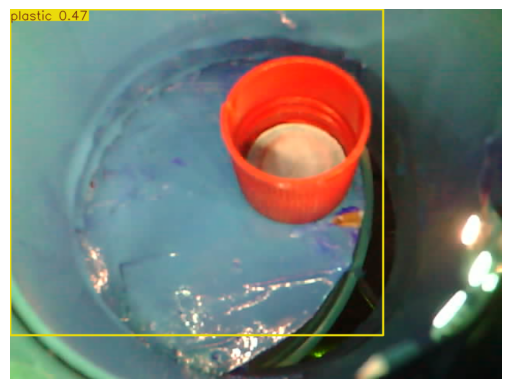

In [6]:
# Plot the original image with detection results
plt.imshow(results[0].plot())  # Plot the image with bounding boxes
plt.axis("off")
plt.show()


In [7]:
# Open the front camera (device index 0)
cap = cv2.VideoCapture(0)

while cap.isOpened():
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    if not ret:
        print("Failed to grab frame")
        break

    # Convert the frame to a PIL image
    pil_image = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

    # Perform object detection
    results = model(pil_image)

    # Convert the results back to a format suitable for OpenCV display
    result_frame = results[0].plot()


    # Display the resulting frame
    cv2.imshow("YOLOv10 Detection - Front Camera", result_frame)

    # Press 'q' to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()



0: 480x640 2 plastics, 629.8ms
Speed: 5.8ms preprocess, 629.8ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 plastics, 823.2ms
Speed: 4.0ms preprocess, 823.2ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 plastics, 800.1ms
Speed: 0.0ms preprocess, 800.1ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 plastics, 1175.5ms
Speed: 2.2ms preprocess, 1175.5ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 plastics, 917.9ms
Speed: 15.7ms preprocess, 917.9ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 plastic, 1007.9ms
Speed: 0.0ms preprocess, 1007.9ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 plastic, 827.3ms
Speed: 2.5ms preprocess, 827.3ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


In [8]:
import cv2
from ultralytics import YOLO
from PIL import Image

# Replace with the path to your trained YOLOv10m model
model_path = "best.pt"  # Update this path to your model file

# Load the YOLOv10m model
model = YOLO(model_path)

# Replace with your ESP32 IP address
url = "http://192.168.1.11/stream"  # Replace with the actual IP of your ESP32-CAM

# Capture the video stream from ESP32-CAM
cap = cv2.VideoCapture(url)

while cap.isOpened():
    ret, frame = cap.read()
    
    if not ret:
        print("Failed to grab frame")
        break

    # Convert the frame to RGB format (OpenCV uses BGR by default)
    pil_image = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

    # Perform object detection using the YOLO model
    results = model(pil_image)

    # Convert the results back to a format suitable for OpenCV display
    result_frame = results[0].plot()

    # Convert the frame from RGB (YOLO output) to BGR (OpenCV format)
    result_frame_bgr = cv2.cvtColor(result_frame, cv2.COLOR_RGB2BGR)

    # Display the resulting frame with detection results
    cv2.imshow("YOLOv10 Detection - ESP32 Video Stream", result_frame_bgr)

    # Break the loop when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()


In [9]:
import cv2
from ultralytics import YOLO
import requests
import torch

# Load the YOLOv10m model with GPU support if available
model_path = "best.pt"
print(f"Loading model from: {model_path}")
model = YOLO(model_path).to("cuda:0" if torch.cuda.is_available() else "cpu")  # Use GPU if available
print("Model loaded successfully.")

# Replace with your ESP32 IP address
url = "http://192.168.1.11/stream"  # Replace with the actual IP of your ESP32-CAM
esp32_command_url = "http://192.168.1.11/command"  # Endpoint to send commands to ESP32 (update as needed)

# Function to send commands to the ESP32
def send_command_to_esp32(command):
    try:
        response = requests.get(f"{esp32_command_url}?action={command}", timeout=0.5)  # Reduced timeout
        print(f"Command '{command}' sent to ESP32. Response: {response.status_code}")
    except requests.RequestException as e:
        print(f"Error sending command to ESP32: {e}")

# Start video capture from ESP32-CAM
print(f"Attempting to connect to the video stream at {url}")
cap = cv2.VideoCapture(url)

if not cap.isOpened():
    print("Error: Unable to open video stream.")
else:
    print("Video stream opened successfully.")

frame_count = 0  # Frame counter

while cap.isOpened():
    ret, frame = cap.read()
    
    if not ret:
        print("Failed to grab frame")
        break

    # Process only every 2nd frame to reduce computation
    if frame_count % 2 == 0:
        frame = cv2.resize(frame, (640, 480))  # Resize frame for faster processing

        # Convert frame from BGR to RGB format
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Perform object detection using YOLO model
        print("Running detection on the frame...")
        results = model(frame_rgb)

        # Extract detected classes
        detected_classes = [model.names[int(box.cls)] for box in results[0].boxes]
        print(f"Detected classes: {detected_classes}")

        # Decide what action to take based on detections
        if 'plastic' in detected_classes:
            send_command_to_esp32('plastic')
        elif 'non-plastic' in detected_classes:
            send_command_to_esp32('non-plastic')
        else:
            send_command_to_esp32('close')

        # Display the frame with detection results every 4 frames to reduce GUI overhead
        if frame_count % 4 == 0: 
            result_frame = results[0].plot()
            cv2.imshow("YOLOv10 Detection - ESP32 Video Stream", cv2.cvtColor(result_frame, cv2.COLOR_RGB2BGR))

    # Break the loop when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        print("Exiting...")
        break

    frame_count += 1  # Increment frame counter

# Release resources
cap.release()
cv2.destroyAllWindows()
print("Released all resources. Exiting.")


Loading model from: best.pt
Model loaded successfully.
Attempting to connect to the video stream at http://192.168.1.11/stream
Video stream opened successfully.
Running detection on the frame...

0: 480x640 1 plastic, 537.8ms
Speed: 11.0ms preprocess, 537.8ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)
Detected classes: ['plastic']
Error sending command to ESP32: HTTPConnectionPool(host='192.168.1.11', port=80): Read timed out. (read timeout=0.5)
Running detection on the frame...

0: 480x640 (no detections), 643.1ms
Speed: 4.0ms preprocess, 643.1ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)
Detected classes: []
Error sending command to ESP32: HTTPConnectionPool(host='192.168.1.11', port=80): Read timed out. (read timeout=0.5)
Running detection on the frame...

0: 480x640 (no detections), 537.4ms
Speed: 0.0ms preprocess, 537.4ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)
Detected classes: []
Error sending command to ESP32: